In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
nhl_rosters = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/nhl_rosters.csv')

head(nhl_rosters)

Rows: 54883 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): team_code, position_type, headshot, first_name, last_name, positi...
dbl   (7): season, player_id, sweater_number, height_in_inches, weight_in_po...
date  (1): birth_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


team_code,season,position_type,player_id,headshot,first_name,last_name,sweater_number,position_code,shoots_catches,height_in_inches,weight_in_pounds,height_in_centimeters,weight_in_kilograms,birth_date,birth_city,birth_country,birth_state_province
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>
ATL,19992000,forwards,8467867,https://assets.nhle.com/mugs/nhl/19992000/ATL/8467867.png,Bryan,Adams,26,L,L,72,185,183,84,1977-03-20,Fort St. James,CAN,British Columbia
ATL,19992000,forwards,8445176,https://assets.nhle.com/mugs/nhl/19992000/ATL/8445176.png,Donald,Audette,28,R,R,68,191,173,87,1969-09-23,Laval,CAN,Quebec
ATL,19992000,forwards,8460014,https://assets.nhle.com/mugs/nhl/19992000/ATL/8460014.png,Eric,Bertrand,83,L,L,73,205,185,93,1975-04-16,St-Ephrem,CAN,Quebec
ATL,19992000,forwards,8460510,https://assets.nhle.com/mugs/nhl/19992000/ATL/8460510.png,Jason,Botterill,28,L,L,76,217,193,98,1976-05-19,Edmonton,CAN,Alberta
ATL,19992000,forwards,8459596,https://assets.nhle.com/mugs/nhl/19992000/ATL/8459596.png,Andrew,Brunette,15,L,L,73,215,185,98,1973-08-24,Sudbury,CAN,Ontario
ATL,19992000,forwards,8445733,https://assets.nhle.com/mugs/nhl/19992000/ATL/8445733.png,Kelly,Buchberger,7,R,L,74,200,188,91,1966-12-02,Langenburg,CAN,Saskatchewan


`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


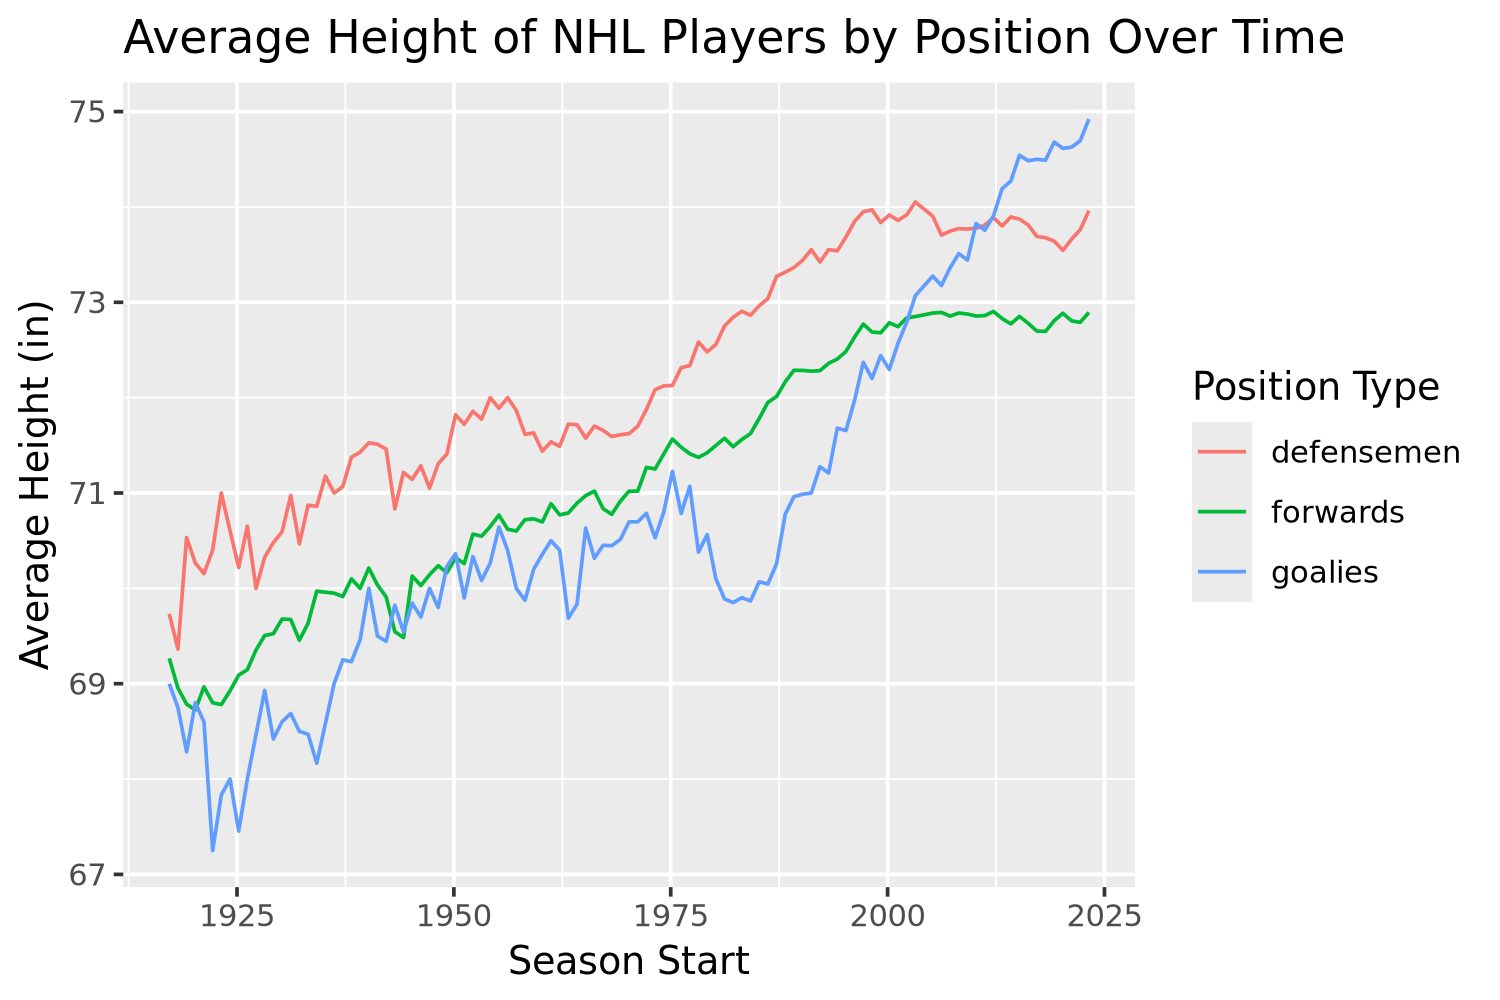

In [3]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)
nhl_rosters |>
    group_by(season, position_type)|>
    filter(!is.na(height_in_inches))|>
    summarize(avg_height = mean(height_in_inches))|>
    ggplot(aes(x=season, y=avg_height, color=position_type)) + geom_line()+
    scale_x_continuous(labels = c("19251926" = "1925", "19501951" = "1950", "19751976" = "1975",
                                "20002001" = "2000", "20252026" = "2025"))+
    xlab("Season Start")+
    ylab("Average Height (in)")+
    ggtitle("Average Height of NHL Players by Position Over Time")+
    labs(color = "Position Type")

This first chart looks at the average heights of NHL hockey players over time stratified by position. Disregarding position type, players have gotten taller overtime, with averages as low as about 67 inches (5'7") in the 1920s to averages as high as 75 inches (6'3") in 2024. When comparing heights based on position type, goalies have seen the largest increase with a spike starting in the 1990s and continuing through the current season, making them the tallest position on the roster. Forwards and defensemen follow similar trends with defensemen keeping about a 1 inch lead on forwards from season to season.   


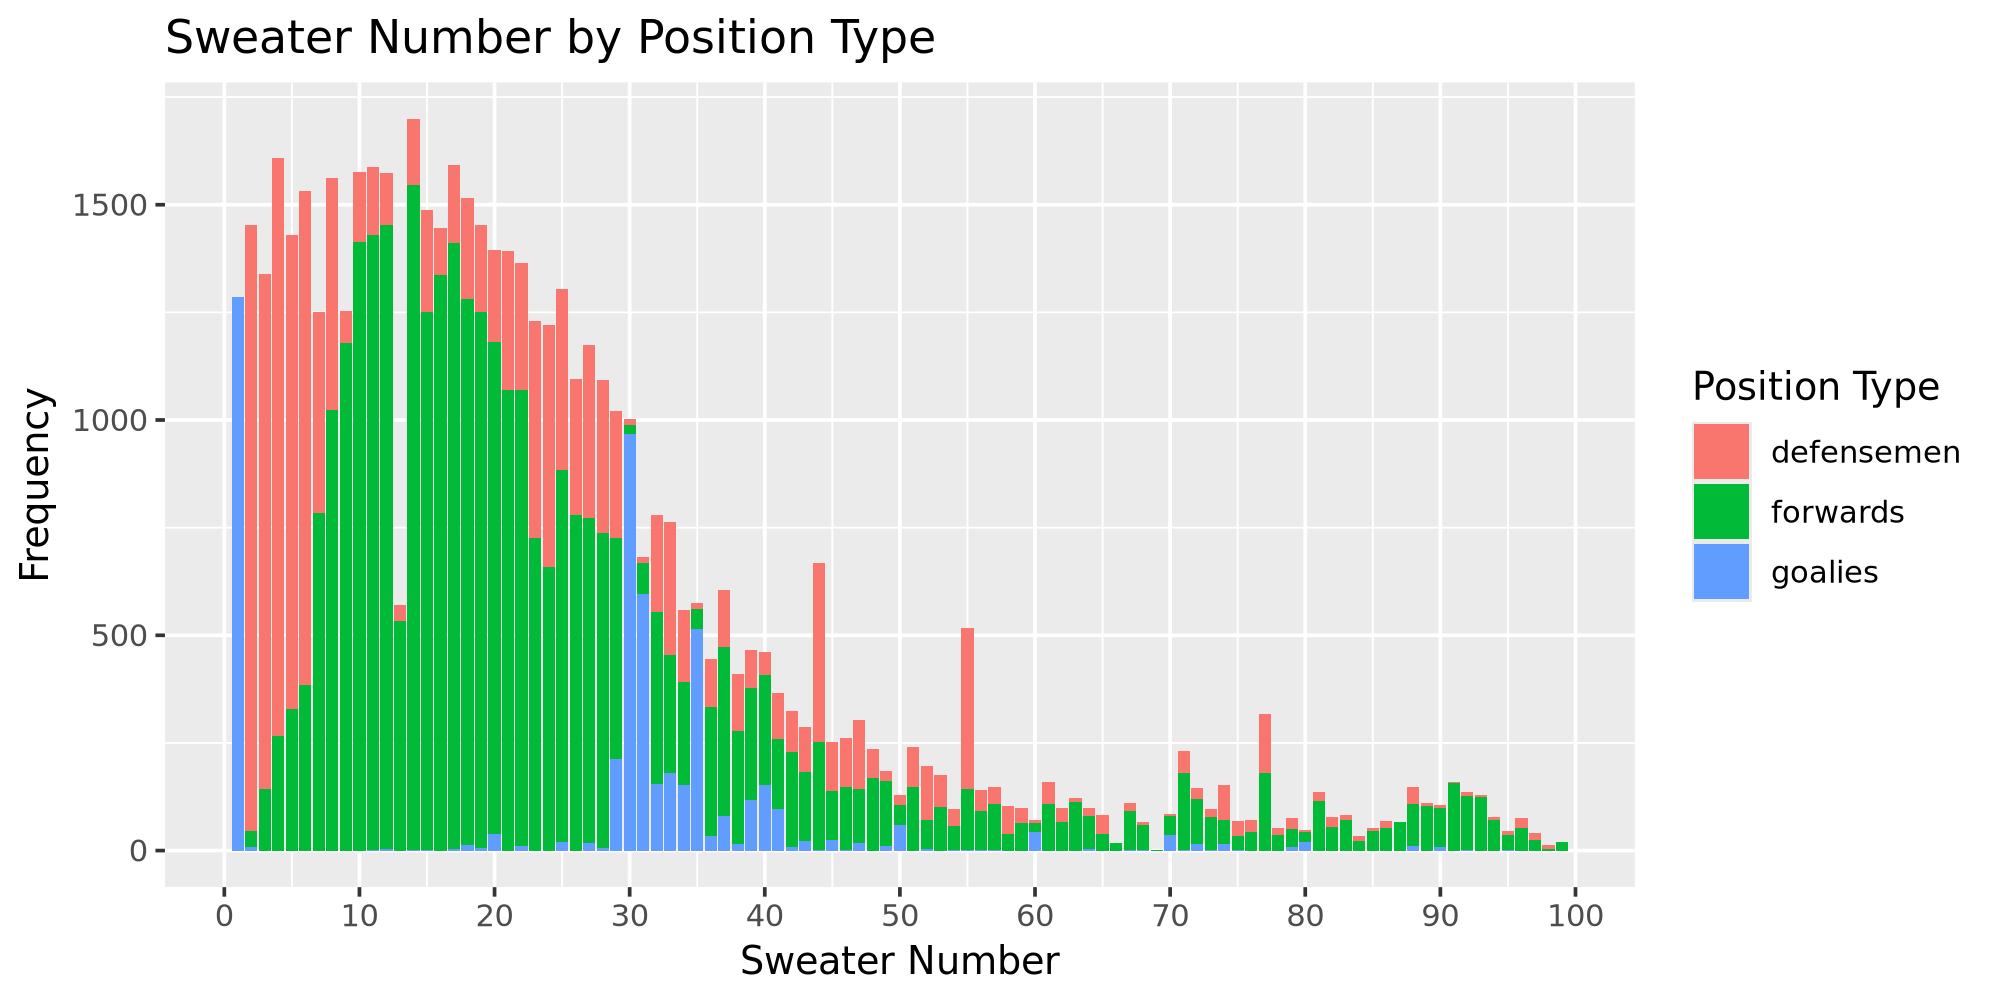

In [4]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 8)
nhl_rosters|>
    ggplot(aes(x=sweater_number, fill=position_type))+geom_bar(na.rm=TRUE)+
    scale_x_continuous(breaks = c(0,10,20,30,40,50,60,70,80,90,100))+
    xlab("Sweater Number")+
    ylab("Frequency")+
    ggtitle("Sweater Number by Position Type")+
    labs(fill = "Position Type")

This next graph looks at sweater numbers by position type. Sweater numbers between 0 and 30 are the most common among players overall. Goalies exclusively wear the number 0 and also commonly wear numbers between 30 and 40. Defensemen dominate the single digit numbers but are also represented throughout the scale. Forwards dominate the rest of the numbers and 6-30 are most common. The later numbers (>40) see a mix of positions but have overall few frequency. 

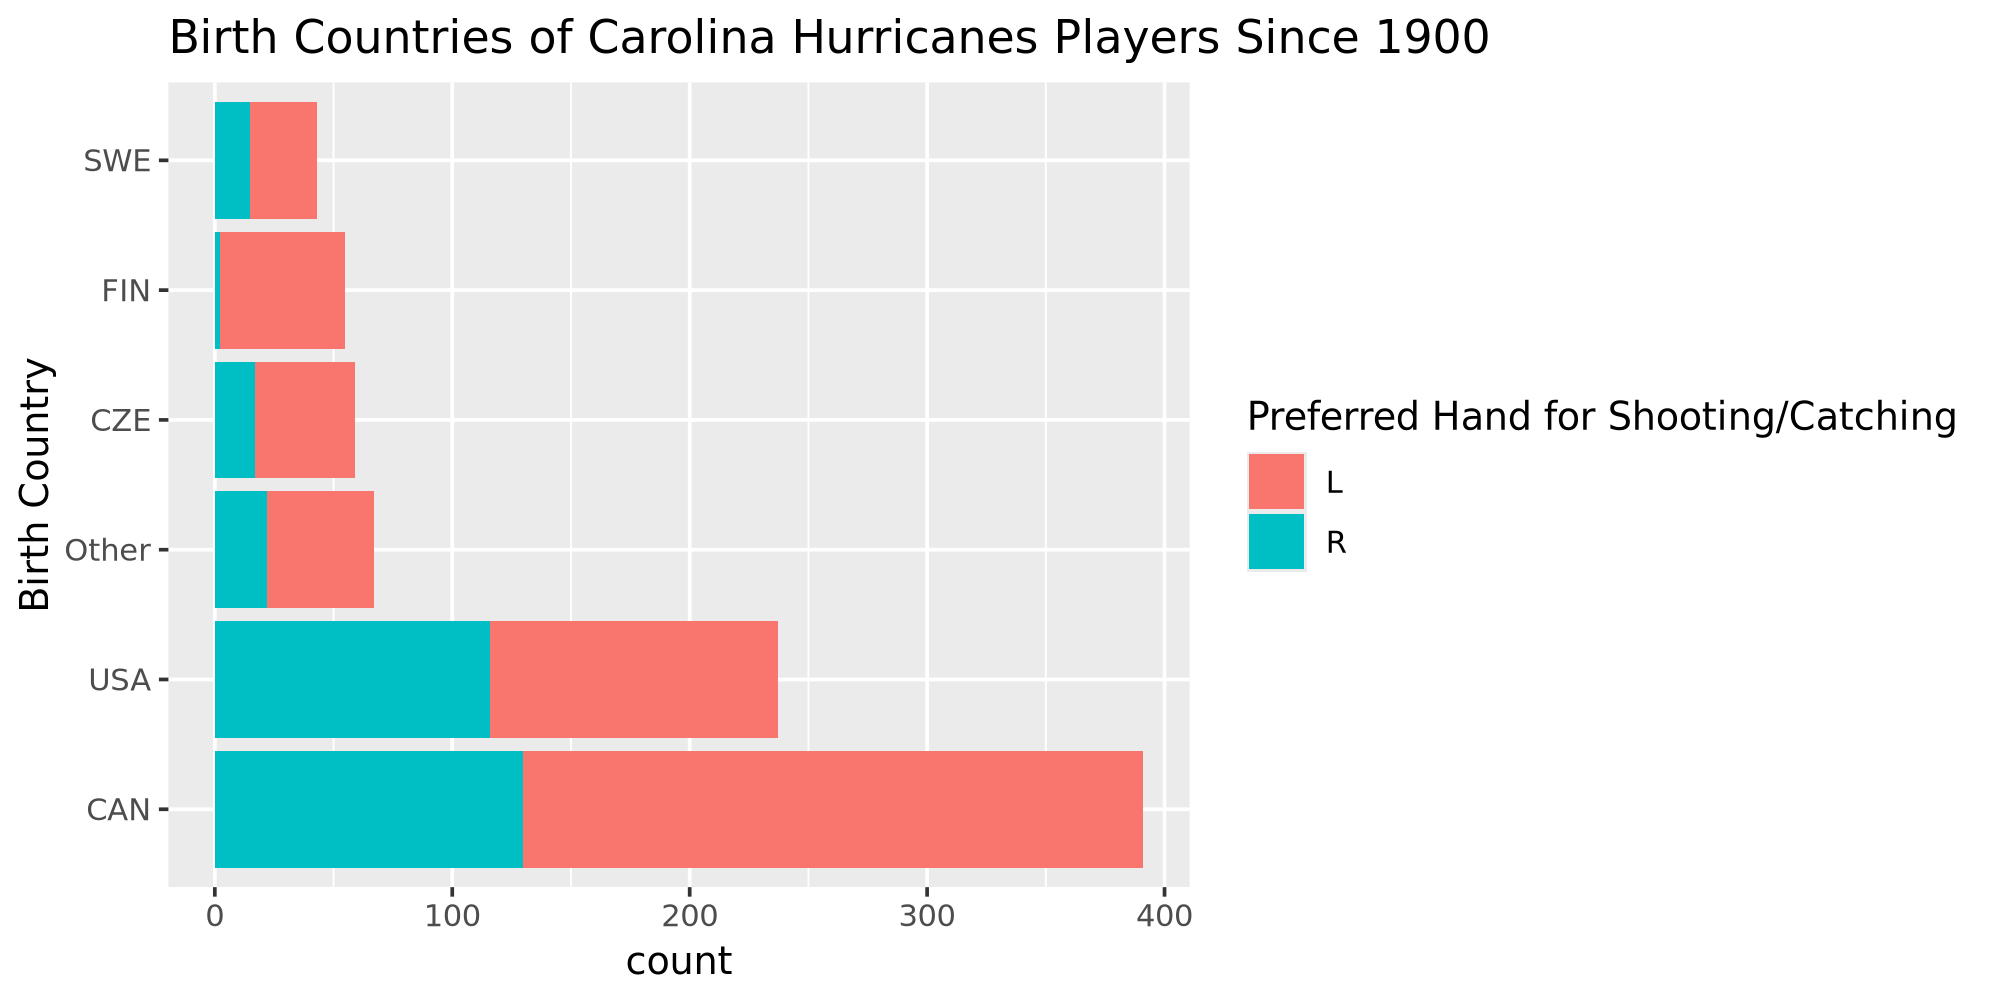

In [5]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 8)
nhl_rosters |>
    filter(team_code == "CAR")|>
    mutate(country_lumped = birth_country|> fct_lump(n = 5)|>fct_infreq())|>
    ggplot(aes(y=country_lumped, fill=shoots_catches)) + geom_bar()+
    ggtitle("Birth Countries of Carolina Hurricanes Players Since 1900")+
    labs(fill = "Preferred Hand for Shooting/Catching")+
    ylab("Birth Country")


This last chart looks at birth countries of Carolina Hurricanes players. It also shows the preferred hand for shooting/catching of these players. The top 5 countries represented, in order, are Canada, USA, Czech Republic, Finland, and Sweden. One interesting takeaway is that almost all of the Hurricanes players born in Finland are lefties. In all countries besides the USA, left handedness is more common. This may be because lefties have a unique skill advantage which can influence selection to the NHL, especially from European countries, as more resources are required to sign European players than American or Canadian players. 